In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [16]:
df= pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [17]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:
#check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [19]:
#check for duplicate row
df.duplicated().sum()

0

In [20]:
df.drop(columns=['Serial No.'],inplace=True)

In [21]:
#split our train test
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
XTS = scaler.fit_transform(X_train)
XTTS = scaler.transform(X_test)

In [49]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Input,Dropout

In [78]:
model = Sequential()
model.add(Input(shape=(7,)))  # define the input layer
model.add(Dense(7, activation='relu'))
#model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='linear'))

In [79]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 4)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

In [80]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


In [81]:
history = model.fit(XTS,y_train,epochs=220,validation_split=0.2)

Epoch 1/220
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.0000e+00 - loss: 0.2347 - val_accuracy: 0.0000e+00 - val_loss: 0.1684
Epoch 2/220
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 0.1488 - val_accuracy: 0.0000e+00 - val_loss: 0.1002
Epoch 3/220
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0841 - val_accuracy: 0.0000e+00 - val_loss: 0.0566
Epoch 4/220
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0382 - val_accuracy: 0.0000e+00 - val_loss: 0.0365
Epoch 5/220
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0267 - val_accuracy: 0.0000e+00 - val_loss: 0.0316
Epoch 6/220
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0220 - val_accuracy: 0.0000e+00 - val_loss: 0.0316
Epoch 7/220
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0218 - val_accuracy: 0.0000e+00 - val_loss: 0.0310
Epoch 8/220
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/s

In [82]:
y_pred=model.predict(XTTS)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [83]:
#now checking r2 score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7824696933015063

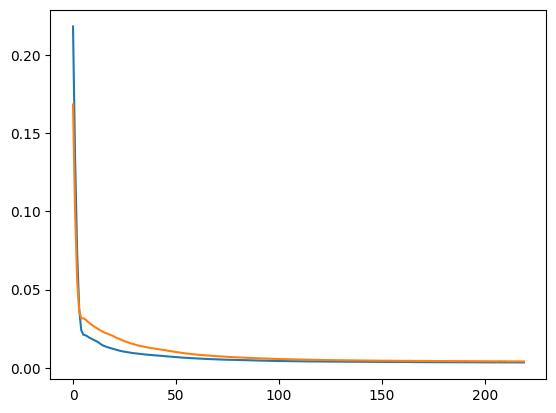

In [84]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

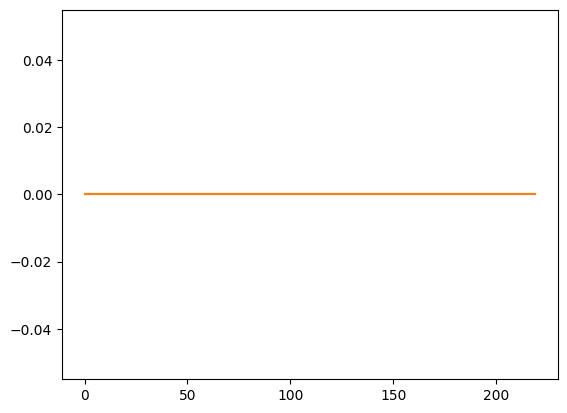

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])